In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# 경고 메시지 무시하기
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # 반응형 모드

In [3]:
stone_data = pd.read_csv('./training_set/stone_dataset.csv') # 바탕화면 기준 Directory Path

# 데이터를 잘 불러왔는지 인덱스 0번째 데이터 정보 값을 테스트 출력 
n = 0

img_name = stone_data.iloc[n, 1]
label = stone_data.iloc[n, 2:]

print('Image name: {}'.format(img_name))
print('label: {}'.format(label))

Image name: 1000-1.jpg
label: Stone O/X         X
Person No.     1000
Image No.     1.jpg
Name: 0, dtype: object


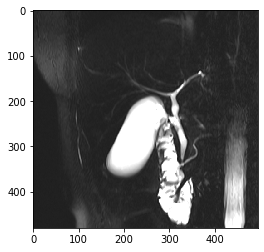

In [4]:
def show_stone(image, label):
    # Stone 이미지와 라벨을 보여줌
    plt.imshow(image)
    plt.pause(0.001)  # 갱신이 되도록 잠시 멈춤

plt.figure()
show_stone(io.imread(os.path.join('./training_set/', img_name)),
               label)
plt.show()

# StoneDataset 데이터셋 클래스 생성

In [6]:
class StoneDataset(Dataset):
    
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # 이미지일 경우 이미지 파일 읽어오기 추가
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = os.path.join(self.root_dir, self.labels.iloc[idx, 1])
        image = io.imread(img_name)
        label = self.labels.iloc[idx, 2:]
        sample = {'image': image, 'label': label}
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample

0 (480, 496, 3) (3,)


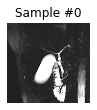

1 (480, 496, 3) (3,)


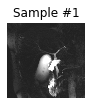

2 (480, 496, 3) (3,)


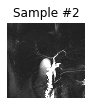

3 (480, 496, 3) (3,)


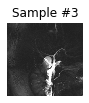

In [7]:
# 만든 데이터셋 클래스를 가지고 이미지를 출력 테스트
stone_dataset = StoneDataset(csv_file='./training_set/stone_dataset.csv',
                            root_dir='./training_set/')

fig = plt.figure()

for i in range(len(stone_dataset)):
    sample = stone_dataset[i]
    
    print(i, sample['image'].shape, sample['label'].shape)
    
    ax = plt.subplot(1, 4, i+1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_stone(**sample)
        
    if i == 3:
        plt.show()
        break

# Person_id getitem Method

In [8]:
def show_stone(image):
    # Stone 이미지와 라벨을 보여줌
    plt.imshow(image)
    plt.pause(0.001)  # 갱신이 되도록 잠시 멈춤

plt.figure()

# 사람 아이디(id)로 이미지를 get하는 메소드 생성
def person_id(id):
    for i in range(4):
        show_stone(io.imread(os.path.join('./training_set/{}-{}.jpg'.format(id, i+1))))
    
    plt.show()

<Figure size 432x288 with 0 Axes>

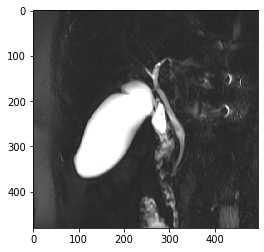

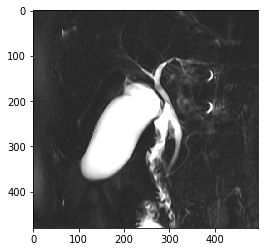

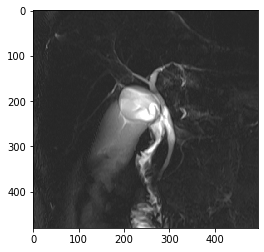

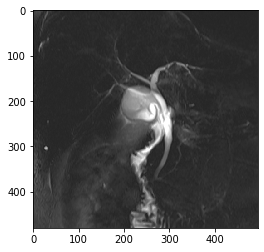

In [9]:
# 생성한 메소드 테스트 출력 (ex. Person_id 1005 환자 데이터 이미지)
person_id(1005)

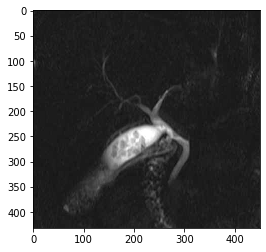

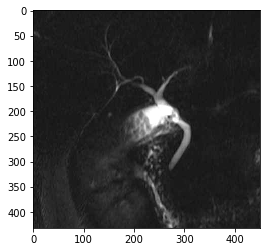

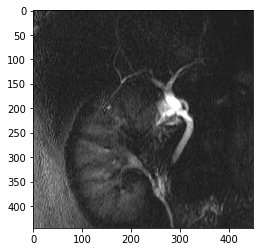

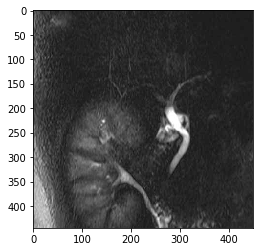

In [10]:
# 생성한 메소드 테스트 출력 (ex. Person_id 247 환자 데이터 이미지)
person_id(247)